In [1]:
import pandas as pd
import sqlite3
import random 
import re
import nltk
import kpss_py3 as stemmer
from string import punctuation
import csv
from unidecode import unidecode
import difflib
from pprint import pprint
import statistics
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import logging
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils
from sklearn.preprocessing import scale
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate
import pandas as pd
import os
import re
import spacy
from gensim.models.phrases import Phrases, Phraser
from time import time 
import multiprocessing
from gensim.models import Word2Vec
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
import keras 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical




text = 'téëëèst'
unidecode(text)

'teeeest'

In [2]:
def tokenize(text_field):
    return nltk.word_tokenize(text_field)

#Im using the most elaborate stopword list of Dutch words I could find, the one in NLTK is limited
def load_stopwords():
    stopwords = []
    stopwords_df = pd.read_csv('stopwordsDutch.txt', header=None)
    stopwords_df.columns = ['Words']
    result = [stopwords.append(x) for x in stopwords_df['Words']]
    return stopwords

def load_specialchars():
    return set(punctuation)

def stopword_removal(tokens):
    stopwords = load_stopwords()
    specialchars = load_specialchars()
    #@ seems to always be at the first word that is not een lidwoord (which gets removed anyways), 
    #so I think it can be filtered out
    #specialchars.remove('@')
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in specialchars:
            cleaned_tokens.append(token)
    return cleaned_tokens

#using the Kraaij-Pohlmann stemmer (see import), which gives the best results from the stemmers I tried
def stem(tokens):
    stemmed_tokens = []
    for token in tokens:
        stemmed_tokens.append(stemmer.stem(token))
    return stemmed_tokens

In [3]:
def process_text(text, splitting=True, lowercase=True, token=True, stopword=True, stemming=True):
    
    #some special characters are glued to other words, specifying to split on those as well
    if splitting:
        text = re.split(r"[^a-zA-Z':;,!?&.`0-9\s]", text) 
        text = ' '.join(word for word in text)
    ##bringing it all together
    if lowercase: 
        text = text.lower()
    if token:
        text = tokenize(text)
    if stopword:
        text = stopword_removal(text)
    if stemming:
        text = stem(text)
    return text

In [4]:
with open('stopwordsDutch.txt','r') as f:
    stopwords = [x.strip() for x in f.readlines()]
tokenizer = nltk.tokenize.WordPunctTokenizer()    

def process_text_tfidf(text, utf= True, lowercase=True, token=True, stopword=True, stemming=True):
    if utf:
        text = unidecode(text)
    if lowercase: 
        text = text.lower()
        tokens = text
    if token:
        tokens = tokenizer.tokenize(text)
    if stopword:
        tokens = [token for token in tokens if token not in stopwords and token.isalpha()]
    if stemming:
        tokens = [stemmer.stem(token) for token in tokens]
    return tokens

## BERT CORRECT FORMAT INPUT

In [7]:
import ktrain
from ktrain import text
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split

def plot_lr(self):
        plt.xlabel("iterations")
        plt.ylabel("learning rate")
        plt.plot(self.iterations, self.lrs)

con = sqlite3.connect('C:/Users/nizar/Downloads/demosaurus.sqlite')
cur = con.cursor()
    #INHOUD = titel + samenvatting boek (annotatie met stempel analyitisch jeugd/volwassen en/of samenvatting uit samenvatting-inhoudsopgave)
getdatabase = cur.execute(
        "SELECT authorship_ggc.author_ppn, titelvermelding FROM publication_basicinfo "
        "INNER JOIN  "  
        "`authorship_ggc` ON authorship_ggc.publication_ppn = publication_basicinfo.publication_ppn INNER JOIN Author_NTA on Author_NTA.author_ppn = authorship_ggc.author_ppn  WHERE kind = 'primair' AND "
        "authorship_ggc.author_ppn in (SELECT author_ppn from authorship_ggc group by author_ppn having count(*) >1) AND foaf_familyname "
        "in (SELECT foaf_familyname from (SELECT foaf_familyname, authorship_ggc.author_ppn FROM Author_NTA INNER JOIN "
        "authorship_ggc on author_NTA.author_ppn = authorship_ggc.author_ppn where kind = 'primair' group by foaf_familyname, authorship_ggc.author_ppn having count(*) "
        "> 1) group by foaf_familyname having count(*) >= 5 and count(*) <= 20)")

cols = [column[0] for column in getdatabase.description]
results= pd.DataFrame.from_records(data = getdatabase.fetchall(), columns = cols)

results["titelvermelding"] = results.apply(lambda row: process_text(row.titelvermelding, True, True, True, True, False),  axis=1)
results['titelvermelding'] = [' '.join(map(str, l)) for l in results['titelvermelding']]
categories = results.author_ppn.unique()
dummies_df = pd.get_dummies(results['author_ppn'], prefix='ppn')
results = pd.concat([results, dummies_df], axis=1)

results = results.drop(['author_ppn'], 1)

results

,titelvermelding,ppn_067473962,ppn_06747943X,ppn_067485332,ppn_067491332,ppn_067520367,ppn_067540996,ppn_067541224,ppn_067541542,ppn_067551971,...,ppn_408667125,ppn_408667206,ppn_40897009X,ppn_408992719,ppn_409087246,ppn_40921003X,ppn_409211672,ppn_40962523X,ppn_410228699,ppn_410246573
0,vertelsels,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,minneke poes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ursula filmscenario tekeningen auteur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,lotje dierentuin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,lotje krijgt nieuwe vrienden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25517,gouden beeld koning nebukadnezar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25518,mensen jezus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25519,jezus koning,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25520,vrienden jezus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## BERT MULTILINGUAL

In [8]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_df(results,
                                                                    'titelvermelding', 
                                                                       label_columns=results.filter(regex='ppn').columns.tolist(),
                                                                       preprocess_mode='bert',
                                                                       maxlen=100, 
                                                                       max_features=100000)

model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=16)

#learner.lr_find()             # voor het vinden van een goede learning rate
#learner.lr_plot()   


learner.fit_onecycle(1e-4, 15)

learner.validate()

preprocessing train...
language: nl


Is Multi-Label? False
preprocessing test...
language: nl


Is Multi-Label? False
maxlen is 100
done.


begin training using onecycle policy with max lr of 0.0001...
Epoch 1/15
1436/1436 [==============================] - 821s 571ms/step - loss: 6.5878 - accuracy: 0.1013 - val_loss: 6.0082 - val_accuracy: 0.1743
Epoch 2/15
1436/1436 [==============================] - 819s 570ms/step - loss: 5.3918 - accuracy: 0.2317 - val_loss: 5.2884 - val_accuracy: 0.2538
Epoch 3/15
1436/1436 [==============================] - 819s 570ms/step - loss: 4.6000 - accuracy: 0.3196 - val_loss: 4.7417 - val_accuracy: 0.3141
Epoch 4/15
1436/1436 [==============================] - 808s 563ms/step - loss: 3.9369 - accuracy: 0.3918 - val_loss: 4.4221 - val_accuracy: 0.3557
Epoch 5/15
1436/1436 [==============================] - 805s 561ms/step - loss: 3.3899 - accuracy: 0.4527 - val_loss: 4.2669 - val_accuracy: 0.3944
Epoch 6/15
1436/1436 [==============================] - 805s 560ms/step - loss: 2.9364 - accuracy: 0.5096 - val_loss: 3.9903 - val_accuracy: 0.4222
Epoch 

C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[3, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## BERTJE

In [7]:
import ktrain
from ktrain import text
MODEL_NAME = 'wietsedv/bert-base-dutch-cased'  # replace this with model of choice
t = text.Transformer(MODEL_NAME, maxlen=200, class_names=results.filter(regex='ppn').columns.tolist())
X = list(results['titelvermelding'])
Y = results.filter(regex='ppn').to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                 random_state=42)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)
learner.fit_onecycle(1e-4, 20)
learner.validate() # class_names must be string values

preprocessing train...
language: nl
train sequence lengths:
	mean : 5
	95percentile : 13
	99percentile : 20


Is Multi-Label? False
preprocessing test...
language: nl
test sequence lengths:
	mean : 5
	95percentile : 13
	99percentile : 20




begin training using onecycle policy with max lr of 0.0001...
Epoch 1/20
1197/1197 [==============================] - 473s 395ms/step - loss: 6.8078 - accuracy: 0.0690 - val_loss: 6.1831 - val_accuracy: 0.1393
Epoch 2/20
1197/1197 [==============================] - 478s 399ms/step - loss: 5.7956 - accuracy: 0.1750 - val_loss: 5.4372 - val_accuracy: 0.2318
Epoch 3/20
1197/1197 [==============================] - 467s 390ms/step - loss: 5.0116 - accuracy: 0.2648 - val_loss: 4.9022 - val_accuracy: 0.3015
Epoch 4/20
1197/1197 [==============================] - 454s 380ms/step - loss: 4.2958 - accuracy: 0.3482 - val_loss: 4.4419 - val_accuracy: 0.3650
Epoch 5/20
1197/1197 [==============================] - 451s 377ms/step - loss: 3.6528 - accuracy: 0.4221 - val_loss: 4.1536 - val_accuracy: 0.4095
Epoch 6/20
1197/1197 [==============================] - 454s 379ms/step - loss: 3.0638 - accuracy: 0.4998 - val_loss: 3.9142 - val_accuracy: 0.4380
Epoch 7/20
1197/1197 [==========================

array([[8, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## FASTTEXT

In [6]:
print(results['titelvermelding'])

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_df(results,
                                                                    'titelvermelding', 
                                                                       label_columns=results.filter(regex='ppn').columns.tolist(),
                                                                       maxlen=200, 
                                                                       max_features=100000,
                                                                       ngram_range=2)

model = text.text_classifier('fasttext', (x_train, y_train), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=16)

#learner.lr_find()             # briefly simulate training to find good learning rate
#learner.lr_plot()   



learner.fit_onecycle(1e-4, 20)

#learner.validate()

0                                         [vertelsels]
1                                      [minneke, poes]
2           [ursula, filmscenario, tekeningen, auteur]
3                                  [lotje, dierentuin]
4                    [lotje, krijgt, nieuwe, vrienden]
                             ...                      
25517            [gouden, beeld, koning, nebukadnezar]
25518                                  [mensen, jezus]
25519                                  [jezus, koning]
25520                                [vrienden, jezus]
25521    [loula, almerus, oorspronkelijk, meisjesboek]
Name: titelvermelding, Length: 25522, dtype: object


IndexError: list index out of range

## WORD2VEC MODEL

In [17]:
w2v_model = KeyedVectors.load_word2vec_format("big\cow-big.txt", binary=False)   

plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 200 dimensions
word_vectors = [w2v_model[w] for w in list(w2v_model.wv.vocab.keys())[:5000]]

# dimensionality reduction. converting the vectors to 2d vectors
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(w2v_model.wv.vocab.keys())[:5000]

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

C:\Users\nizar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.285s...
[t-SNE] Computed neighbors for 5000 samples in 11.582s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.345499
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.085861
[t-SNE] KL divergence after 1000 iterations: 2.074473


C:\Users\nizar\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()


## WORD2VEC + LR TEXT CLASSIFIER

In [14]:
#Word2Vec Neural Network


con = sqlite3.connect('C:/Users/nizar/Downloads/demosaurus.sqlite')
cur = con.cursor()
    #INHOUD = titel + samenvatting boek (annotatie met stempel analyitisch jeugd/volwassen en/of samenvatting uit samenvatting-inhoudsopgave)
getdatabase = cur.execute(
        "SELECT authorship_ggc.author_ppn, titelvermelding FROM publication_basicinfo "
        "INNER JOIN  "  
        "`authorship_ggc` ON authorship_ggc.publication_ppn = publication_basicinfo.publication_ppn INNER JOIN Author_NTA on Author_NTA.author_ppn = authorship_ggc.author_ppn  WHERE kind = 'primair' AND "
        "authorship_ggc.author_ppn in (SELECT author_ppn from authorship_ggc group by author_ppn having count(*) >1) AND foaf_familyname "
        "in (SELECT foaf_familyname from (SELECT foaf_familyname, authorship_ggc.author_ppn FROM Author_NTA INNER JOIN "
        "authorship_ggc on author_NTA.author_ppn = authorship_ggc.author_ppn where kind = 'primair' group by foaf_familyname, authorship_ggc.author_ppn having count(*) "
        "> 1) group by foaf_familyname having count(*) > 5 and count(*) < 20)")

cols = [column[0] for column in getdatabase.description]
results= pd.DataFrame.from_records(data = getdatabase.fetchall(), columns = cols)

results["titelvermelding"] = results.apply(lambda row: process_text(row.titelvermelding, True, False, False, False, False),  axis=1)

X = results.drop('author_ppn', axis=1)
y = results['author_ppn']

wv = KeyedVectors.load_word2vec_format("320\combined-320.txt", binary=False)

wv.init_sims(replace=True)

from itertools import islice
print(list(islice(wv.vocab, 13030, 13050)))



def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

def w2v_tokenize_text(text):
    return process_text(text, True, True, True, True, False)
    
train, test = train_test_split(results, random_state=42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['titelvermelding']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['titelvermelding']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
logreg = LogisticRegression(n_jobs=1, C=1e6)
logreg = logreg.fit(X_train_word_average, train['author_ppn'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.author_ppn))
print(classification_report(test.author_ppn, y_pred))
    
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import ExtraTreesClassifier

# etree_w2v = Pipeline([
#     ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
#     ("extra trees", ExtraTreesClassifier(n_estimators=200))])
# etree_w2v_tfidf = Pipeline([
#     ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
#     ("extra trees", ExtraTreesClassifier(n_estimators=200))])

# etree_w2v.fit(X_train, y_train)
# y_pred_class = classifier.predict(X_test)
# print(classification_report(y_test, y_pred_class))

['lima', 'grondstof', 'shock', 'gerechtvaardigd', 'diene', 'toerde', 'concludeert', 'mandela', 'uitblijven', 'milities', 'serena', 'quiz', 'parallelle', 'vervaardigen', 'hospitaal', 'gevels', 'luna', 'emi', 'bonen', 'erotische']


C:\Users\nizar\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).


C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.4879140555058192
              precision    recall  f1-score   support

   067473962       1.00      1.00      1.00         2
   06747943X       0.88      0.64      0.74        11
   067485332       1.00      1.00      1.00         1
   067520367       0.00      0.00      0.00         2
   067540996       0.54      0.64      0.58        11
   067541542       0.00      0.00      0.00         1
   067551971       0.00      0.00      0.00         2
   067658296       1.00      0.33      0.50         3
   067684483       0.00      0.00      0.00         1
   067697828       0.00      0.00      0.00         1
   067764339       0.00      0.00      0.00         0
   067899161       0.00      0.00      0.00         1
   067905994       0.00      0.00      0.00         2
   067929206       0.00      0.00      0.00         1
   067936180       0.00      0.00      0.00         0
   067937489       0.00      0.00      0.00         1
   067949622       0.73      0.73      0.73        15

C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## WORD2VEC + NN TEXT CLASSIFIER

         raw_ppn                           titelvermelding  author_ppn
0      068380275                                vertelsels           0
1      068380275                              minneke poes           0
2      069193029     ursula filmscenario tekeningen auteur           1
3      068877048                          lotje dierentuin           2
4      068877048              lotje krijgt nieuwe vrienden           2
...          ...                                       ...         ...
25517  072118288          gouden beeld koning nebukadnezar         263
25518  072118288                              mensen jezus         263
25519  072118288                              jezus koning         263
25520  072118288                            vrienden jezus         263
25521  071426353  loula almerus oorspronkelijk meisjesboek          41

[25522 rows x 3 columns]
['vertelsels' 'minneke poes' 'ursula filmscenario tekeningen auteur' ...
 'jezus koning' 'vrienden jezus'
 'loula almerus 

(19141, 320)
shape for training set :  (19141, 320) 
shape for test set :  (6381, 320)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 1000)              321000    
_________________________________________________________________
activation_84 (Activation)   (None, 1000)              0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 500)               500500    
_________________________________________________________________
activation_85 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 500)               0         
________________________________

Epoch 17/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3423 - accuracy: 0.2522 - val_loss: 5.2427 - val_accuracy: 0.3156
Epoch 18/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3366 - accuracy: 0.2550 - val_loss: 5.2685 - val_accuracy: 0.3213
Epoch 19/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3449 - accuracy: 0.2524 - val_loss: 5.3095 - val_accuracy: 0.3210
Epoch 20/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3229 - accuracy: 0.2558 - val_loss: 5.3372 - val_accuracy: 0.3159
Epoch 21/100
383/383 [==============================] - 3s 7ms/step - loss: 4.2987 - accuracy: 0.2565 - val_loss: 5.4473 - val_accuracy: 0.3117
Epoch 22/100
383/383 [==============================] - 3s 7ms/step - loss: 4.2977 - accuracy: 0.2583 - val_loss: 5.3967 - val_accuracy: 0.3134
Epoch 23/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3132 - accuracy: 0.2557 - val_loss: 5.3209 - val_accuracy:

Epoch 74/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3991 - accuracy: 0.2659 - val_loss: 6.1660 - val_accuracy: 0.3141
Epoch 75/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3817 - accuracy: 0.2660 - val_loss: 6.3354 - val_accuracy: 0.3178
Epoch 76/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3562 - accuracy: 0.2695 - val_loss: 6.2397 - val_accuracy: 0.3144
Epoch 77/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3594 - accuracy: 0.2704 - val_loss: 6.3594 - val_accuracy: 0.3181
Epoch 78/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3606 - accuracy: 0.2697 - val_loss: 6.3966 - val_accuracy: 0.3142
Epoch 79/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3837 - accuracy: 0.2694 - val_loss: 6.3427 - val_accuracy: 0.3153
Epoch 80/100
383/383 [==============================] - 3s 7ms/step - loss: 4.3680 - accuracy: 0.2694 - val_loss: 6.1848 - val_accuracy:

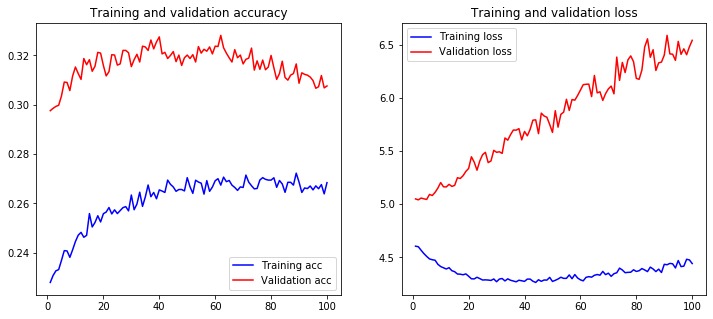

In [40]:
con = sqlite3.connect('C:/Users/nizar/Downloads/demosaurus.sqlite')
cur = con.cursor()
    #INHOUD = titel + samenvatting boek (annotatie met stempel analyitisch jeugd/volwassen en/of samenvatting uit samenvatting-inhoudsopgave)
getdatabase = cur.execute(
        "SELECT authorship_ggc.author_ppn as raw_ppn, titelvermelding FROM publication_basicinfo "
        "INNER JOIN  "  
        "`authorship_ggc` ON authorship_ggc.publication_ppn = publication_basicinfo.publication_ppn INNER JOIN Author_NTA on Author_NTA.author_ppn = authorship_ggc.author_ppn  WHERE kind = 'primair' AND "
        "authorship_ggc.author_ppn in (SELECT author_ppn from authorship_ggc group by author_ppn having count(*) >1) AND foaf_familyname "
        "in (SELECT foaf_familyname from (SELECT foaf_familyname, authorship_ggc.author_ppn FROM Author_NTA INNER JOIN "
        "authorship_ggc on author_NTA.author_ppn = authorship_ggc.author_ppn where kind = 'primair' group by foaf_familyname, authorship_ggc.author_ppn having count(*) "
        "> 1) group by foaf_familyname having count(*) >= 5 and count(*) <= 20)")

cols = [column[0] for column in getdatabase.description]
results= pd.DataFrame.from_records(data = getdatabase.fetchall(), columns = cols)

results["titelvermelding"] = results.apply(lambda row: process_text(row.titelvermelding, True, True, True, True, False),  axis=1)

results['titelvermelding'] = [' '.join(map(str, l)) for l in results['titelvermelding']]

results['author_ppn'] = pd.factorize(results['raw_ppn'])[0] 
print(results)
X = np.array(results['titelvermelding'])
y = results['author_ppn'].values

print(X)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 random_state=0)
                                                    
                                                 

vectorizer = TfidfVectorizer(analyzer=lambda x: x)
matrix = vectorizer.fit_transform([x.split(" ") for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(tfidf)
print ('vocab size :', len(tfidf))

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v_model[word].reshape((1, size)) * tfidf[word]
            count += 1.
            #print(word)
        except KeyError: # handling the case where the token is not
            #print(word)             # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec
print(X_train)
train_vecs_w2v = np.concatenate([buildWordVector(z, 320) for z in map(lambda x: x.split(" "), X_train)])
train_vecs_w2v = scale(train_vecs_w2v)
print(train_vecs_w2v.shape)

test_vecs_w2v = np.concatenate([buildWordVector(z, 320) for z in map(lambda x: x.split(" "), X_test)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)


nb_classes = 2509
np.random.seed(42)
batch_size = 64
nb_epochs = 20

model = Sequential()

model.add(Dense(1000, input_shape=(320,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)
print(y_test)

print(train_vecs_w2v.shape)
print(test_vecs_w2v.shape)
print(y_test.shape)
print(y_train.shape)

history = model.fit(train_vecs_w2v, y_train, epochs=20, batch_size=batch_size)


print (model.summary())

# y_train_predclass = model.predict_classes(train_vecs_w2v,batch_size=batch_size)
# print(y_train_predclass)
# y_test_predclass = model.predict_classes(test_vecs_w2v,batch_size=batch_size)

# from sklearn.metrics import accuracy_score,classification_report
# print ("nnDeep Neural Network - Train accuracy:"),(round(accuracy_score(y_train, y_train_predclass),3))
# print ("nDeep Neural Network - Test accuracy:"),(round(accuracy_score(y_test,y_test_predclass),3))
# print ("nDeep Neural Network - Train Classification Report")
# print (classification_report(y_train,y_train_predclass))
# print ("nDeep Neural Network - Test Classification Report")
# print (classification_report(y_test,y_test_predclass))

history = model.fit(train_vecs_w2v, y_train, epochs=100, batch_size=50,
                   validation_data=(test_vecs_w2v,y_test))
loss, accuracy = model.evaluate(train_vecs_w2v, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

## TFIDF + NEURAL NETWORK

In [15]:
con = sqlite3.connect('C:/Users/nizar/Downloads/demosaurus.sqlite')
cur = con.cursor()
    #INHOUD = titel + samenvatting boek (annotatie met stempel analyitisch jeugd/volwassen en/of samenvatting uit samenvatting-inhoudsopgave)
getdatabase = cur.execute(
        "SELECT authorship_ggc.author_ppn as raw_ppn, titelvermelding FROM publication_basicinfo "
        "INNER JOIN  "  
        "`authorship_ggc` ON authorship_ggc.publication_ppn = publication_basicinfo.publication_ppn INNER JOIN Author_NTA on Author_NTA.author_ppn = authorship_ggc.author_ppn  WHERE kind = 'primair' AND "
        "authorship_ggc.author_ppn in (SELECT author_ppn from authorship_ggc group by author_ppn having count(*) >1) AND foaf_familyname "
        "in (SELECT foaf_familyname from (SELECT foaf_familyname, authorship_ggc.author_ppn FROM Author_NTA INNER JOIN "
        "authorship_ggc on author_NTA.author_ppn = authorship_ggc.author_ppn where kind = 'primair' group by foaf_familyname, authorship_ggc.author_ppn having count(*) "
        "> 1) group by foaf_familyname having count(*) >= 5 and count(*) <= 20)")

cols = [column[0] for column in getdatabase.description]
results= pd.DataFrame.from_records(data = getdatabase.fetchall(), columns = cols)

results["titelvermelding"] = results.apply(lambda row: process_text_tfidf(row.titelvermelding),  axis=1)

#results.author_ppn.replace('X', '44444', regex=True, inplace=True)
#results['titelvermelding'] = results['titelvermelding'].apply(ast.literal_eval).apply(' '.join)
results['titelvermelding'] = [' '.join(map(str, l)) for l in results['titelvermelding']]

results['author_ppn'] = pd.factorize(results['raw_ppn'])[0] 
print(results)
X = results.drop('author_ppn', axis=1)
y = results['author_ppn']



X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 random_state=0)

from sklearn.decomposition import TruncatedSVD


# building TFIDF vectorizer
print(X_train)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
x_train_2 = vectorizer.fit_transform(X_train["titelvermelding"]).todense()
x_test_2 = vectorizer.transform(X_test["titelvermelding"]).todense()

#UNCOMMENT FOR LSA AND CHANGE INPUT SHAPE IN NN
# svd = TruncatedSVD(n_components = 1000)
# x_train_2 = svd.fit_transform(x_train_2)
# x_test_2 = svd.transform(x_test_2)


np.random.seed(42)
nb_classes = 2509
batch_size = 64
nb_epochs = 20

y_trainz = np_utils.to_categorical(y_train, nb_classes)
print(y_trainz.shape)
print(x_train_2)

model = Sequential()
model.add(Dense(1000,input_shape= (10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(x_train_2, y_trainz, batch_size=batch_size, epochs=nb_epochs,verbose=1)


print (model.summary())

y_train_predclass = model.predict_classes(x_train_2,batch_size=batch_size)
y_test_predclass = model.predict_classes(x_test_2,batch_size=batch_size)

from sklearn.metrics import accuracy_score,classification_report
print ("nnDeep Neural Network - Train accuracy:"),(round(accuracy_score(y_train, y_train_predclass),3))
print ("nDeep Neural Network - Test accuracy:"),(round(accuracy_score(y_test,y_test_predclass),3))
print ("nDeep Neural Network - Train Classification Report")
print (classification_report(y_train,y_train_predclass))
print ("nDeep Neural Network - Test Classification Report")
print (classification_report(y_test,y_test_predclass))

         raw_ppn                                    titelvermelding  \
0      068380275                                        @Vertelsels   
1      068380275                                      @Minneke poes   
2      069193029  @Ursula : een filmscenario met tekeningen van ...   
3      068877048                            @Lotje in de dierentuin   
4      068877048                      @Lotje krijgt nieuwe vrienden   
...          ...                                                ...   
25517  072118288          Het @gouden beeld van koning Nebukadnezar   
25518  072118288                               @Mensen rondom Jezus   
25519  072118288                                   @Jezus de Koning   
25520  072118288                             De @vrienden van Jezus   
25521  071426353        @Loula Almerus : oorspronkelijk meisjesboek   

       author_ppn  
0               0  
1               0  
2               1  
3               2  
4               2  
...           ...  
25517  

C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nizar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## TFIDF + LSA + NEURAL NETWORK